# Cellular Automata - SIR Model

The SIR (Susceptible, Infected, Removed) model is a simple model of infectious diseases.  

There are 3 compartments:
- Susceptible - people not yet infected and not immune
- Infected - currently infected
- Removed - people removed from further participation who are interpreted as immune or dead

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
from enum import IntEnum

%matplotlib notebook

Model parameters:
- size - map size
- c - probability of becoming removed
- start_infected - number of infected in the beggining

In [2]:
# parameters
size = 100
c = 0.1 # probability of becoming removed
start_infected = 5 # number of infected at start

Unit enum is responsible for the state of the unit. It can be SUSCEPTIBLE, INFECTED or REMOVED.

In [3]:
class Unit(IntEnum):
    SUSCEPTIBLE = 0
    INFECTED = 2
    REMOVED = 3

The get_neighbour function for x and y returns a new x and y, which are the coordinates of a random neighbor. The function validates the parameters for coordinates at the ends of the matrix.

In [4]:
def get_neighbour(x, y):
    arr_x = []
    arr_y = []

    if x == 0:
        arr_x = [0,1]
    elif x == size-1:
        arr_x = [-1,0]
    else:
        arr_x = [-1,0,1]

    nx = np.random.choice(arr_x)
    if nx == 0:
        if y == 0:
            arr_y = [1]
        elif y == size-1:
            arr_y = [-1]
        else:
            arr_y = [-1,1]
    else:
        if y == 0:
            arr_y = [0,1]
        elif y == size-1:
            arr_y = [-1,0]
        else:
            arr_y = [-1,0,1]

    ny = np.random.choice(arr_y)
    return (x+nx, y+ny)

The update function operates on the matrix of all persons in each iteration. Determines new states depending on the model and parameters.

In [5]:
def update():
    susceptible = 0
    infected = 0
    removed = 0
    
    new_infected = set()
    
    for i in range(0,size):
        for j in range(0,size):
            if matrix[i][j] == Unit.INFECTED:
                rand = np.random.random(1)[0]
                if rand < c:
                    matrix[i][j] = Unit.REMOVED
                else:
                    x2, y2 = get_neighbour(i, j)

                    if matrix[x2][y2] == Unit.SUSCEPTIBLE:
                        new_infected.add((x2, y2))
            
            # update amount of units
            if matrix[i][j] == Unit.SUSCEPTIBLE:
                susceptible += 1
            elif matrix[i][j] == Unit.INFECTED:
                infected += 1
            elif matrix[i][j] == Unit.REMOVED:
                removed += 1
            
    for item in new_infected:
        x, y = item
        print(x,y)
        matrix[x][y] = Unit.INFECTED
        susceptible -= 1
        infected += 1
    
    # update amount of units
    susceptible_amount.append(susceptible)
    infected_amount.append(infected)
    removed_amount.append(removed)

In [6]:
xs = [0]
index = count()

def animate(i):
    if infected_amount[-1] == 0:
        anim.event_source.stop()
        im.set_array(matrix)
        return [im]

    xs.append(next(index))

    update()
    im.set_array(matrix)
    return [im]


def animate2(i):
    if infected_amount[-1] == 0:
        anim2.event_source.stop()
        return

    pl.cla()
    pl.plot(xs, susceptible_amount, color="blue", label="Susceptible")
    pl.plot(xs, infected_amount, color="orange", label="Infected")
    pl.plot(xs, removed_amount, color="red", label="Removed")
    pl.set_xlabel('Time')
    pl.set_ylabel('Amount')
    pl.set_title('Amount of people in time')
    pl.legend()
    pl.grid(True)

Variable initialization (matrix and counters) and drawing a map and abundance graph of each state.

In [7]:
susceptible_amount = infected_amount = removed_amount = 0
matrix = 0

def init():
    global susceptible_amount, infected_amount, removed_amount, xs, index, matrix
    # init amounts
    susceptible_amount = [size*size]
    infected_amount = [start_infected]
    removed_amount = [0]
    xs = [0]
    index = count()
    
    # init matrix
    matrix = np.zeros((size, size), dtype=int)
    for i in range(0, start_infected):
        rand = np.random.randint(low=0, high=size, size=2)
        matrix[rand[0]][rand[1]] = 2

<IPython.core.display.Javascript object>


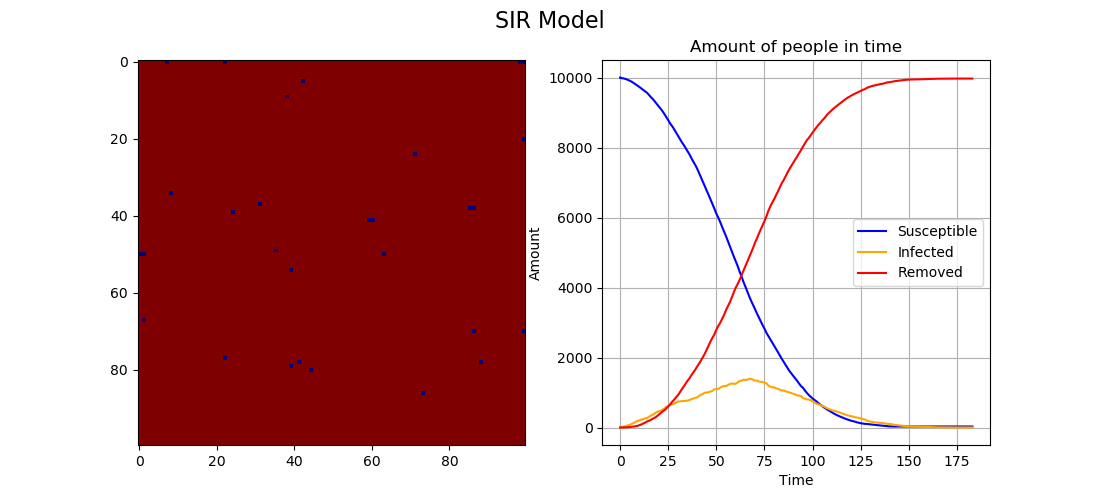

In [8]:
init()

# plot
fig = plt.figure(figsize=(11,5))
fig.suptitle('SIR Model', fontsize=16)
im = fig.add_subplot(1,2,1)
im = plt.imshow(matrix, interpolation='none', aspect='auto', cmap="jet", vmax=3)
# fig.colorbar(im)
pl = fig.add_subplot(1,2,2)
pl.plot([], [])

time_interval = 200
anim = FuncAnimation(fig, animate, interval=time_interval, blit=True)
anim2 = FuncAnimation(fig, animate2, interval=time_interval)

For the parameters: probability of being removed = 0.1 and number of infected in the beginning = 5 most people were infected, but some manages not to be.

<IPython.core.display.Javascript object>


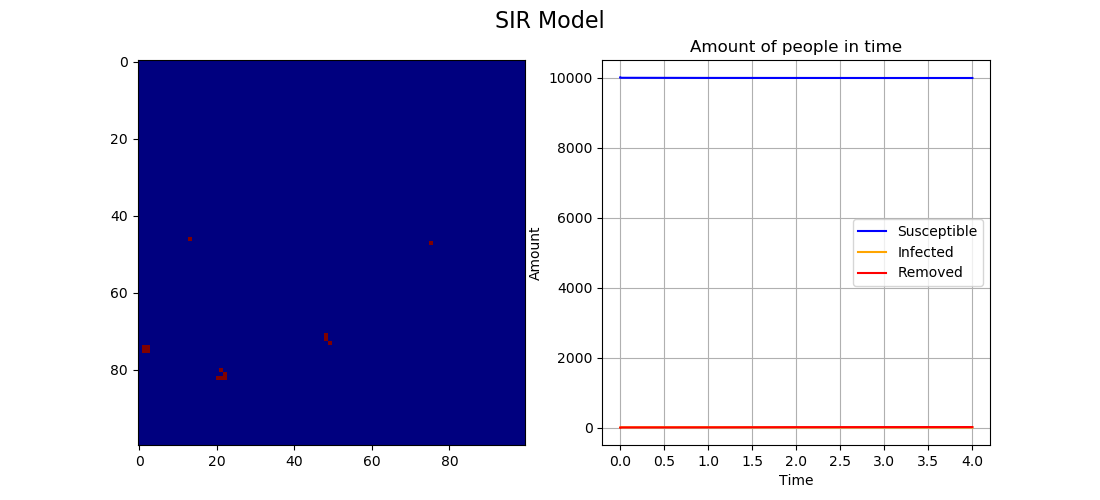

In [9]:
# parameters
size = 100
c = 0.5 # probability of becoming removed
start_infected = 5 # amount of infected at start

init()

# plot
fig = plt.figure(figsize=(11,5))
fig.suptitle('SIR Model', fontsize=16)
im = fig.add_subplot(1,2,1)
im = plt.imshow(matrix, interpolation='none', aspect='auto', cmap="jet", vmax=3)
# fig.colorbar(im)
pl = fig.add_subplot(1,2,2)
pl.plot([], [])

time_interval = 200
anim = FuncAnimation(fig, animate, interval=time_interval, blit=True)
anim2 = FuncAnimation(fig, animate2, interval=time_interval)

For the parameters: the probability of being removed = 0.5 and the number of infected at the beginning = 5 the disease will not spread in time and eventually few people will be removed and the disease will disappear.

<IPython.core.display.Javascript object>


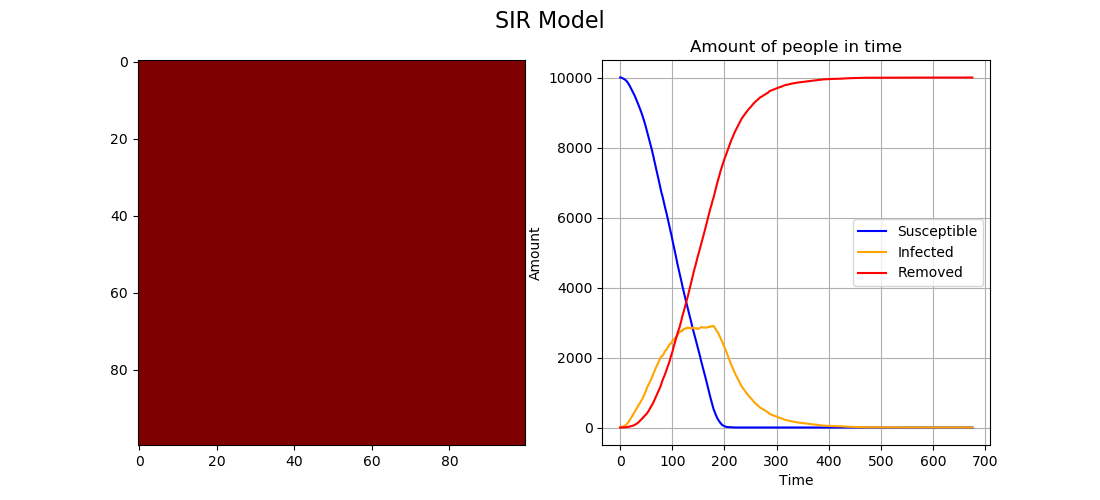

In [10]:
# parameters
size = 100
c = 0.02 # probability of becoming removed
start_infected = 1 # amount of infected at start

init()

# plot
fig = plt.figure(figsize=(11,5))
fig.suptitle('SIR Model', fontsize=16)
im = fig.add_subplot(1,2,1)
im = plt.imshow(matrix, interpolation='none', aspect='auto', cmap="jet", vmax=3)
# fig.colorbar(im)
pl = fig.add_subplot(1,2,2)
pl.plot([], [])

time_interval = 200
anim = FuncAnimation(fig, animate, interval=time_interval, blit=True)
anim2 = FuncAnimation(fig, animate2, interval=time_interval)

For the parameters: the probability of being removed = 0.02 and the number of infected at the beginning = 1, it can be seen that despite the fact that the probability of being removed is very low, the disease managed to spread to the entire population before it began to rapidly remove individuals. As a result, the entire population was "removed".